In [142]:
# Definindo a versão do tensorflow
%tensorflow_version 1.x

In [143]:
# Importanto bibliotecas gerais
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Importando bibliotecas Scikit Learn:
from sklearn.datasets import make_circles


# **Gradient Descent**

In [144]:
seed = 21
N = 1000
x, y = make_circles(n_samples=N, random_state=42, noise=0.1, factor=0.2)

# Fazendo o reshape para y:
y = y.reshape(-1, 1)

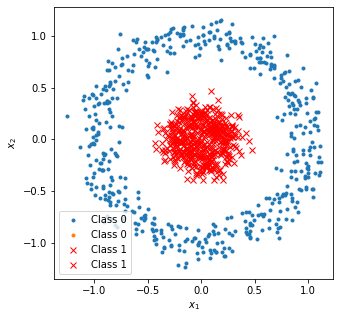

In [145]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x[idx0,0], x[idx0,1], '.', label='Class 0')
plt.plot(x[idx1,0], x[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

In [146]:
# Imprimindo a configuração do dataset:
print('Dimensão de X: {}'.format(x.shape))
print('Dimensão de Y: {}'.format(y.shape))

Dimensão de X: (1000, 2)
Dimensão de Y: (1000, 1)


In [147]:
# Configuração dos neuronios:
entrada = 2
oculta1  = 4 
oculta2 = 2
saida   = 1

In [148]:
# Definição dos pesos
W = {'oculta1': tf.Variable(tf.random_normal([entrada, oculta1])),
     'oculta2': tf.Variable(tf.random_normal([oculta1, oculta2])),
     'saida': tf.Variable(tf.random_normal([oculta2, saida])) 
}

In [149]:
B = {'oculta1': tf.Variable(tf.random_normal([oculta1])),
     'oculta2': tf.Variable(tf.random_normal([oculta2])),
     'saida': tf.Variable(tf.random_normal([saida]))   
}

In [150]:
# Definindo os placeholder's:
xph = tf.placeholder(tf.float32, [1000, entrada], name = 'xph')
yph = tf.placeholder(tf.float32, [1000, saida], name = 'yph')

In [151]:
# Camada OCULTA 1:

# Multiplicando as entradas pelos pesos da camada oculta e adicionando o bias na camada oculta:
oculta1 = tf.add(tf.matmul(xph, W['oculta1']), B['oculta1'])
# Aplicando a função de ativação na camada oculta:
ativacao_oculta1 = tf.sigmoid(oculta1)

In [152]:
# Camada OCULTA 2:

# Multiplicando as entradas pelos pesos da camada oculta e adicionando o bias na camada oculta:
oculta2 = tf.add(tf.matmul(ativacao_oculta1, W['oculta2']), B['oculta2'])
# Aplicando a função de ativação na camada oculta:
ativacao_oculta2 = tf.sigmoid(oculta2)

In [168]:
# Camada SAÍDA:

# Multiplicando as saídas da camada oculta pelos pesos da camada de saída e adicionando o bias na cadama de saída:
saida = tf.add(tf.matmul(ativacao_oculta2, W['saida']), B['saida'])
# Aplicando a função de ativação na camada de saída:
ativacao_saida = tf.sigmoid(saida)

In [169]:
# Cálculo do erro quadrático médio:
error = tf.losses.mean_squared_error(yph, ativacao_saida)

# Definindo o otimizador:
otm = tf.train.GradientDescentOptimizer(learning_rate=0.3).minimize(error)

In [170]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(20000):
    mean_error = 0
    _, cost = sess.run([otm, error], feed_dict= {xph: x, yph: y})
    if epoch % 100 == 0:
      mean_error += cost / 4
      print('Epoch: {}'.format(epoch))
      print('Mean error: {}'.format(mean_error))

  W_final, B_final = sess.run([W, B])

Epoch: 0
Mean error: 0.07933157682418823
Epoch: 100
Mean error: 0.061741627752780914
Epoch: 200
Mean error: 0.061585232615470886
Epoch: 300
Mean error: 0.061390720307826996
Epoch: 400
Mean error: 0.061147432774305344
Epoch: 500
Mean error: 0.06084181368350983
Epoch: 600
Mean error: 0.060457002371549606
Epoch: 700
Mean error: 0.059972748160362244
Epoch: 800
Mean error: 0.0593656525015831
Epoch: 900
Mean error: 0.058610085397958755
Epoch: 1000
Mean error: 0.05767848342657089
Epoch: 1100
Mean error: 0.056539081037044525
Epoch: 1200
Mean error: 0.055148396641016006
Epoch: 1300
Mean error: 0.053439829498529434
Epoch: 1400
Mean error: 0.051323823630809784
Epoch: 1500
Mean error: 0.04872602969408035
Epoch: 1600
Mean error: 0.04565790668129921
Epoch: 1700
Mean error: 0.04225383698940277
Epoch: 1800
Mean error: 0.03873494639992714
Epoch: 1900
Mean error: 0.03533187881112099
Epoch: 2000
Mean error: 0.032192450016736984
Epoch: 2100
Mean error: 0.029291240498423576
Epoch: 2200
Mean error: 0.026405

# **Adam**

In [171]:
seed = 21
N = 1000
x, y = make_circles(n_samples=N, random_state=42, noise=0.1, factor=0.2)

# Fazendo o reshape para y:
y = y.reshape(-1, 1)

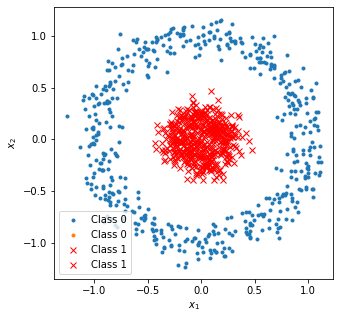

In [172]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x[idx0,0], x[idx0,1], '.', label='Class 0')
plt.plot(x[idx1,0], x[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

In [173]:
# Imprimindo a configuração do dataset:
print('Dimensão de X: {}'.format(x.shape))
print('Dimensão de Y: {}'.format(y.shape))

Dimensão de X: (1000, 2)
Dimensão de Y: (1000, 1)


In [159]:
# Configuração dos neuronios:
entrada = 2
oculta1  = 4 
oculta2 = 2
saida   = 1

In [160]:
# Definição dos pesos
W = {'oculta1': tf.Variable(tf.random_normal([entrada, oculta1])),
     'oculta2': tf.Variable(tf.random_normal([oculta1, oculta2])),
     'saida': tf.Variable(tf.random_normal([oculta2, saida])) 
}

In [161]:
B = {'oculta1': tf.Variable(tf.random_normal([oculta1])),
     'oculta2': tf.Variable(tf.random_normal([oculta2])),
     'saida': tf.Variable(tf.random_normal([saida]))   
}

In [162]:
# Definindo os placeholder's:
xph = tf.placeholder(tf.float32, [1000, entrada], name = 'xph')
yph = tf.placeholder(tf.float32, [1000, saida], name = 'yph')

In [163]:
# Camada OCULTA 1:

# Multiplicando as entradas pelos pesos da camada oculta e adicionando o bias na camada oculta:
oculta1 = tf.add(tf.matmul(xph, W['oculta1']), B['oculta1'])
# Aplicando a função de ativação na camada oculta:
ativacao_oculta1 = tf.sigmoid(oculta1)

In [164]:
# Camada OCULTA 2:

# Multiplicando as entradas pelos pesos da camada oculta e adicionando o bias na camada oculta:
oculta2 = tf.add(tf.matmul(ativacao_oculta1, W['oculta2']), B['oculta2'])
# Aplicando a função de ativação na camada oculta:
ativacao_oculta2 = tf.sigmoid(oculta2)

In [174]:
# Camada SAÍDA:

# Multiplicando as saídas da camada oculta pelos pesos da camada de saída e adicionando o bias na cadama de saída:
saida = tf.add(tf.matmul(ativacao_oculta2, W['saida']), B['saida'])
# Aplicando a função de ativação na camada de saída:
ativacao_saida = tf.sigmoid(saida)

In [175]:
# Cálculo do erro quadrático médio:
error = tf.losses.mean_squared_error(yph, ativacao_saida)

# Definindo o otimizador:
otm = tf.train.AdamOptimizer(learning_rate=0.3).minimize(error)

In [176]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(20000):
    mean_error = 0
    _, cost = sess.run([otm, error], feed_dict= {xph: x, yph: y})
    if epoch % 100 == 0:
      mean_error += cost / 4
      print('Epoch: {}'.format(epoch))
      print('Mean error: {}'.format(mean_error))

  W_final, B_final = sess.run([W, B])

Epoch: 0
Mean error: 0.12059547752141953
Epoch: 100
Mean error: 0.0625012069940567
Epoch: 200
Mean error: 0.06249984726309776
Epoch: 300
Mean error: 0.062499817460775375
Epoch: 400
Mean error: 0.06249971687793732
Epoch: 500
Mean error: 0.062499139457941055
Epoch: 600
Mean error: 1.0631583791109733e-05
Epoch: 700
Mean error: 2.7298115128360223e-06
Epoch: 800
Mean error: 2.291615146532422e-06
Epoch: 900
Mean error: 2.0268694242986385e-06
Epoch: 1000
Mean error: 1.8374919363850495e-06
Epoch: 1100
Mean error: 1.6897645309654763e-06
Epoch: 1200
Mean error: 1.5678273257435649e-06
Epoch: 1300
Mean error: 1.4631760905103874e-06
Epoch: 1400
Mean error: 1.3708554433833342e-06
Epoch: 1500
Mean error: 1.2878326742793433e-06
Epoch: 1600
Mean error: 1.2121382724217256e-06
Epoch: 1700
Mean error: 1.1424509693824803e-06
Epoch: 1800
Mean error: 1.0778529713206808e-06
Epoch: 1900
Mean error: 1.017674208014796e-06
Epoch: 2000
Mean error: 9.614162763682543e-07
Epoch: 2100
Mean error: 9.086870704777539e-07

# Resposta teórica:

O adam conseguiu uma melhor performance que a descida do gradiente, isso pode ser facilmente percebido pelo valor do erro ao final das 20000 épocas. Sendo que sua convergência já começa com valores menores e também apresenta uma perfomance mais rápida na redução do erro.